# Kaggle NLP Disaster data-set inspection

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import collections
import itertools
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import preprocessor as p
%matplotlib inline



In [2]:
#get dataframe
df = pd.read_csv('data/dataSet.csv', encoding='latin-1')

### Next lets get some basics

In [3]:
df.shape

(10876, 13)

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [5]:
#remove unused columns
df.drop(['_golden', '_unit_id', '_unit_state','_trusted_judgments','_last_judgment_at','choose_one:confidence','choose_one_gold','location','tweetid','userid'], axis = 1, inplace = True)
df.rename(columns = {'choose_one': 'relevance','choose_one:confidence': 'confidence'}, inplace = True)
df.head()

,relevance,keyword,text
0,Relevant,NaN,Just happened a terrible car crash
1,Relevant,NaN,Our Deeds are the Reason of this #earthquake M...
2,Relevant,NaN,"Heard about #earthquake is different cities, s..."
3,Relevant,NaN,"there is a forest fire at spot pond, geese are..."
4,Relevant,NaN,Forest fire near La Ronge Sask. Canada


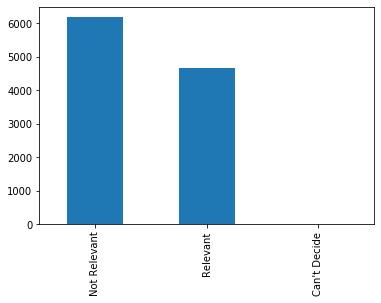

In [6]:
#The number of actual dister tweets compared to non-relevant tweets
df['relevance'].value_counts().plot(kind='bar')

In [7]:
df['relevance'].value_counts()

Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: relevance, dtype: int64

In [8]:
df['relevance'] = df['relevance'].map({'Relevant': 1, 'Not Relevant': 0})
df.head()

,relevance,keyword,text
0,1.0,NaN,Just happened a terrible car crash
1,1.0,NaN,Our Deeds are the Reason of this #earthquake M...
2,1.0,NaN,"Heard about #earthquake is different cities, s..."
3,1.0,NaN,"there is a forest fire at spot pond, geese are..."
4,1.0,NaN,Forest fire near La Ronge Sask. Canada


In [10]:
words = set(nltk.corpus.words.words())
for index, row in df.iterrows():
    df.at[index, 'text'] = p.clean(row['text'])
    df.at[index, 'text'] = BeautifulSoup(row['text'],'lxml')
    df.at[index, 'text'] = re.sub(r'@[A-Za-z0-9]+','',row['text'])
    df.at[index, 'text'] = re.sub('https?://[A-Za-z0-9./]+','',row['text'])
    df.at[index, 'text'] = re.sub('[^a-zA-Z]','', row['text'])

## Leaving space for more word editing like stopwords

### Now lets take the data set and break it into training and test data. 
#### Let's train on 80% and test on the last fifth.

In [11]:
# using numpy to make a random sample for each set
trainSetIndex, testSetIndex = list(), list()
for i in range(df.shape[0]):
    if np.random.uniform(0,1) < 0.8:
        trainSetIndex += [i]
    else:
        testSetIndex += [i]
trainSet = df.loc[trainSetIndex]
testSet = df.loc[testSetIndex]

trainSet.reset_index(inplace = True)
trainSet.drop(['index'], axis = 1, inplace = True)
testSet.reset_index(inplace = True)
testSet.drop(['index'], axis = 1, inplace = True)
testSet.head()

,relevance,keyword,text
0,1.0,NaN,Just happened a terrible car crash
1,1.0,NaN,people receive wildfires evacuation or...
2,0.0,NaN,They d probably still show more life than Arse...
3,0.0,NaN,Hey How are you
4,0.0,NaN,What a nice hat


In [12]:
trainSet.head()

,relevance,keyword,text
0,1.0,NaN,Our Deeds are the Reason of this earthquake M...
1,1.0,NaN,Heard about earthquake is different cities s...
2,1.0,NaN,there is a forest fire at spot pond geese are...
3,1.0,NaN,Forest fire near La Ronge Sask Canada
4,1.0,NaN,All residents asked to shelter in place are ...


# Clean Data
## lets make it do something
### stop words should still be in

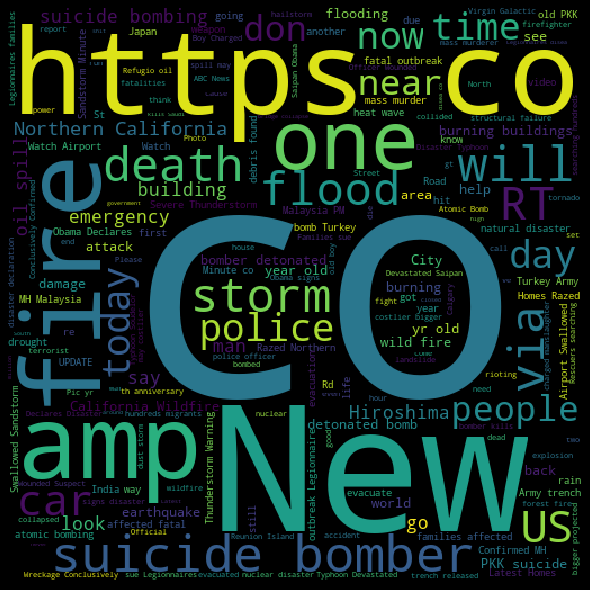

In [17]:
disaster_words = ' '.join(list(df[df['relevance'] == 1]['text']))
disaster_wc = WordCloud(width = 512,height = 512).generate(disaster_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(disaster_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()                               

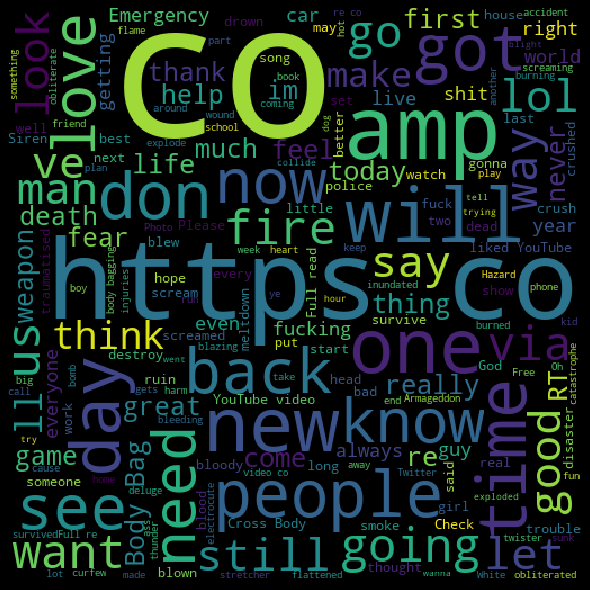

In [18]:
disaster_words = ' '.join(list(df[df['relevance'] == 0]['text']))
disaster_wc = WordCloud(width = 512,height = 512).generate(disaster_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(disaster_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()      

## nothing to see here

In [16]:
allWords = trainSet['text']
wordCounts = collections.Counter(allWords)
wordCounts.most_common(15)


[('One Direction Is my pick for http   t co q eBlOKeVE Fan Army  Directioners http   t co eNCmhz y   x    ',
  10),
 ('   Year Old Boy Charged With Manslaughter of Toddler  Report  An    year old boy has been charged with manslaughter over the fatal sh   ',
  9),
 ('Black Eye    A space battle occurred at Star O    involving   fleets totaling      ships with    destroyed',
  7),
 (' POTUS  StrategicPatience is a strategy for  Genocide  refugees  IDP Internally displaced people  horror  etc  https   t co rqWuoy fm ',
  6),
 ('Beyonce Is my pick for http   t co nnMQlz  o  Fan Army  Beyhive http   t co o  f cYy R   ',
  5),
 ('Madhya Pradesh Train Derailment  Village Youth Saved Many Lives', 5),
 ('The Prophet  peace be upon him  said  Save yourself from Hellfire even if it is by giving half a date in charity  ',
  5),
 (' Bestnaijamade    yr old PKK suicide bomber who detonated bomb in     http   t co KSAwlYuX   bestnaijamade bestnaijamade bestnaijamade be   ',
  5),
 ('Wreckage  Conclus